<a href="https://colab.research.google.com/github/sameh999/Machine-learning/blob/main/ML_Group9_Assignment_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Statments that used through code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.datasets import make_classification, make_circles
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import SGDClassifier

In [ ]:
def loadDataset():
    header_list = ["Colum1", "Column2","label"]
    seeds_train = pd.read_csv("/content/seeds_train.csv",names=header_list)
    seeds_test = pd.read_csv("/content/seeds_test.csv",names=header_list)
    #print(seeds_train)
    
    X_train = seeds_train[["Colum1", "Column2"]]
    y_train = seeds_train["label"]
    X_test = seeds_test[["Colum1", "Column2"]]
    y_test = seeds_test["label"]
    return X_train, y_train, X_test, y_test

In [ ]:
# prepareDataset takes your dataset features and labels and can remove specific class 
def prepareDataset(X, y, cls_remove=None):
    cls = [1, 2, 3]
    if cls_remove is not None:
        features = []
        labels = []
        for index, (feat, label) in enumerate(zip(X, y)):
            if y[index] != cls_remove:
                features.append(feat)
                labels.append(label)
        cls.pop(cls_remove-1)
    else:
        features = X
        labels = y
    return np.array(features), np.array(labels), cls

In [ ]:
def getClassNames(cls):
    cls_all = ["Kama", "Rosa" ,"Canadian"]
    new_cls = []
    for i in cls:
        new_cls.append(cls_all[i-1])
    return new_cls

In [ ]:
def getAccuracy(model, x, y):
    return model.score(x,y)*100

In [ ]:
def plotData(features, labels, cls, class_names):
    colors = ['r', 'b', 'g']
    markers = ['o', '*', '+']
    for class_index in range(len(cls)):   
      plt.scatter(features[labels == cls[class_index],0], features[labels == cls[class_index],1],
                  c=colors[class_index], marker=markers[class_index], label=class_names[class_index])
    Title = "Seeds Dataset with 2 classes Rosa , Canadian".format(n=int(len(cls)))
    plt.xlabel( 'First Feature' )
    plt.ylabel( 'Fifth Feature' )
    plt.title(Title)
    
    plt.legend()

In [ ]:
def plotRegions(model,X):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    XX, YY = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    z = model.predict(np.c_[XX.ravel(), YY.ravel()])
    ZZ = z.reshape(XX.shape)
    plt.contourf(XX, YY, ZZ, alpha=0.2)

# SVM Model 

Class names= ['Rosa', 'Canadian']
Updated class index: [2, 3]
Number of samples: 111
Number of features: 2
 Model Accuracy : 100.00%


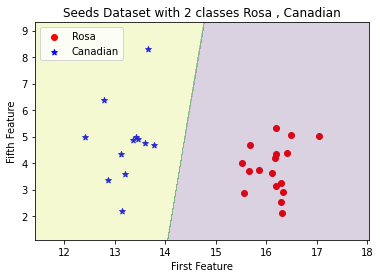


Classification Report:

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        12

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29


Confusion Matrix:

[[17  0]
 [ 0 12]]


Text(0.5, 1.0, 'SVM Confusion Matrix')

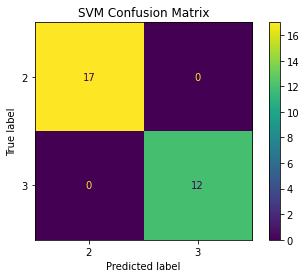

In [ ]:
# load Dataset 
features_train, labeled_train, features_test,labeled_test = loadDataset()
# Remove Class Kama  from Train Dataset
X_train, y_train, cls_new = prepareDataset(features_train.to_numpy(), 
                                               labeled_train.to_numpy(), cls_remove=1)
# Remove Class Kama  from test Dataset
X_test, y_test, cls_new = prepareDataset(features_test.to_numpy(),
                                             labeled_test.to_numpy(),cls_remove=1)
# get class Names
class_names = getClassNames(cls_new)

print('Class names=', class_names)
print('Updated class index:', cls_new)
print("Number of samples:", X_train.shape[0])
print("Number of features:", X_train.shape[1])
    
# use SVM Model with Linear Kernel 
model = svm.SVC(kernel='linear', decision_function_shape='ovo')
model.fit(X_train, y_train)
print(' Model Accuracy : {:.2f}%'.format(getAccuracy(model, X_test, y_test)))

# Plot data
plotData(X_test, y_test, cls_new, class_names)
plotRegions(model, X_test)
plt.legend(loc="upper left")
plt.show()

# make classification report
y_true, y_pred = y_test, model.predict(X_test)
print('\nClassification Report:\n')
print(classification_report(y_true, y_pred))

# use confusion Matrix
print('\nConfusion Matrix:\n')
print(confusion_matrix(y_test, y_pred))
pp = plot_confusion_matrix(model, X_test, y_test)
pp.ax_.set_title("SVM Confusion Matrix")

# Perceptron Model 

Accuracy: 0.83


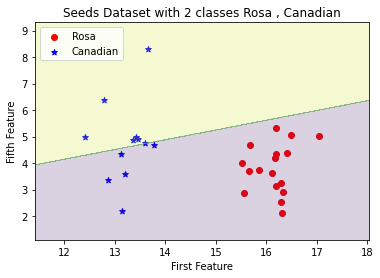


Classification Report:

              precision    recall  f1-score   support

           2       0.77      1.00      0.87        17
           3       1.00      0.58      0.74        12

    accuracy                           0.83        29
   macro avg       0.89      0.79      0.80        29
weighted avg       0.87      0.83      0.82        29


Confusion Matrix:

[[17  0]
 [ 5  7]]


Text(0.5, 1.0, 'Perceptor Confusion Matrix')

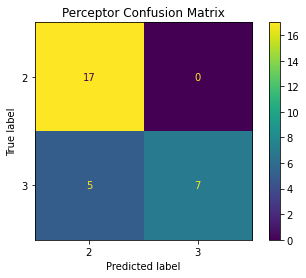

In [ ]:

# load Dataset 
features_train, labeled_train, features_test,labeled_test = loadDataset()
  
#Remove Class Kama From Train Dataset 
X_train, y_train, cls_new = prepareDataset(features_train.to_numpy(), 
                                               labeled_train.to_numpy(), cls_remove=1)
#Remove Class Kama From Test Dataset 
X_test, y_test, cls_new = prepareDataset(features_test.to_numpy(),
                                             labeled_test.to_numpy(),cls_remove=1)
# get classes names
class_names = getClassNames(cls_new)

# use Perceptor Model 
clf = Perceptron(random_state=0 ,validation_fraction=.1 ,class_weight=None)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

# plot Data
plotData(X_test, y_test, cls_new, class_names)
plotRegions(clf,X_test)
plt.legend(loc="upper left")
plt.show()

# classifiction Report
y_true, y_pred = y_test, clf.predict(X_test)
print('\nClassification Report:\n')
print(classification_report(y_true, y_pred))

# use Confution Matrix
print('\nConfusion Matrix:\n')
print(confusion_matrix(y_test, y_pred))
pp=plot_confusion_matrix(clf, X_test, y_test)
pp.ax_.set_title("Perceptor Confusion Matrix")


# OVR SVM 

In [ ]:
#Obtain the binarized label (1 for positive class, -1 for negative class)
def binarizedlabels(y_labels,myclass):
    y_labels = np.copy(y_labels)
    for index, label in enumerate(y_labels):
         if y_labels[index] == myclass:
             y_labels[index]=1
         else: 
             y_labels[index]=-1
    return y_labels

In [ ]:
# plotting for decision boundaries
def plot_data_regions(model,features, labels ):
 plt.scatter(features.iloc[:,0].values, features.iloc[:,1].values, c=['r' if l==1 else 'g' for l in labels],marker='*')
 ax = plt.gca()  
 Title = "Seeds Dataset with 2 classes"
 plt.title(Title)
 plt.xlabel("First Feature")
 plt.ylabel( 'Fifth Feature' )
 xlim = ax.get_xlim()
 ylim = ax.get_ylim()
 xx = np.linspace(xlim[ 0], xlim[1], 50)
 yy = np.linspace(ylim[ 0], ylim[1], 50)
 XX, YY = np.meshgrid(xx, yy)
 z = np.vstack([XX.ravel(), YY.ravel()]).T
 ZZ = model.decision_function(z) .reshape(XX.shape)
 ax.contourf(XX, YY, ZZ, colors=[ 'r','g'], levels=0, alpha=0.2)

Accuracy of SVM1: 88.09523809523809


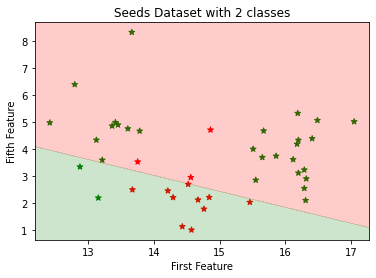

              precision    recall  f1-score   support

          -1       0.90      0.93      0.92        29
           1       0.83      0.77      0.80        13

    accuracy                           0.88        42
   macro avg       0.87      0.85      0.86        42
weighted avg       0.88      0.88      0.88        42

confusion_matrix_SVM1:
[[27  2]
 [ 3 10]]


Text(0.5, 1.0, 'SVM1 Confusion Matrix')

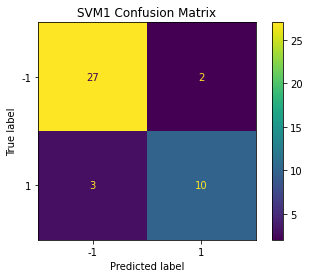

In [ ]:
  # SVM1 Classifier

X_train, y_train, X_test,y_test = loadDataset()

y1_train =binarizedlabels(y_train,1)
y1_test =binarizedlabels(y_test,1)

SVM1 = svm.SVC(kernel='linear',decision_function_shape= 'ovo',
               probability=True).fit(X_train,y1_train)
#obtaining accuracy
Accuracy_SVM1 = SVM1.score(X_test, y1_test)*100
print("Accuracy of SVM1:",Accuracy_SVM1)
plot_data_regions(SVM1,X_test, y1_test)
plt.show()

svmy_true1, svmy_pred1=y1_test, SVM1.predict(X_test) 
print(classification_report(svmy_true1, svmy_pred1))
print("confusion_matrix_SVM1:")
print(confusion_matrix(svmy_true1, svmy_pred1))

pp=plot_confusion_matrix(SVM1, X_test, y1_test)
pp.ax_.set_title("SVM1 Confusion Matrix")



Accuracy of SVM2: 97.61904761904762


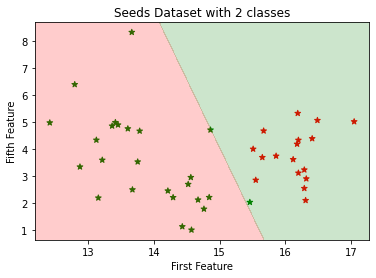

              precision    recall  f1-score   support

          -1       1.00      0.96      0.98        25
           1       0.94      1.00      0.97        17

    accuracy                           0.98        42
   macro avg       0.97      0.98      0.98        42
weighted avg       0.98      0.98      0.98        42

confusion_matrix_SVM2:
[[24  1]
 [ 0 17]]


Text(0.5, 1.0, 'SVM2 Confusion Matrix')

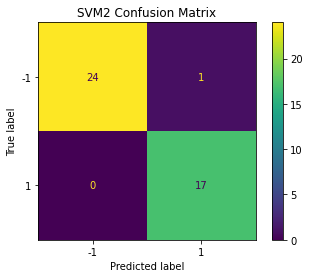

In [ ]:
# SVM2 Classifier

y2_train =binarizedlabels(y_train,2)
y2_test =binarizedlabels(y_test,2)

SVM2 = svm.SVC(kernel='linear',decision_function_shape= 'ovo',probability=True).fit(X_train,y2_train)
#obtaining accuracy
Accuracy_SVM2 = SVM2.score(X_test, y2_test)*100
print("Accuracy of SVM2:",Accuracy_SVM2)

plot_data_regions(SVM2,X_test, y2_test)
plt.show()

svmy_true2, svmy_pred2=y2_test, SVM2.predict(X_test) 
print(classification_report(svmy_true2, svmy_pred2))
print("confusion_matrix_SVM2:")
print(confusion_matrix(svmy_true2, svmy_pred2))

pp=plot_confusion_matrix(SVM2, X_test, y2_test)
pp.ax_.set_title("SVM2 Confusion Matrix")


Accuracy of SVM3: 100.0


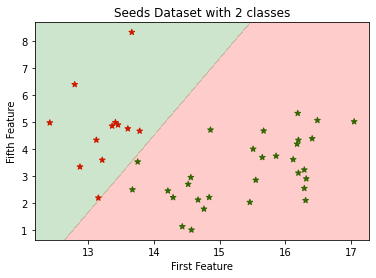

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        12

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42

confusion_matrix_SVM3:
[[30  0]
 [ 0 12]]


Text(0.5, 1.0, 'SVM3 Confusion Matrix')

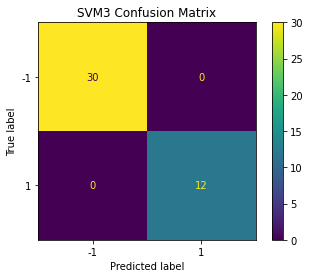

In [ ]:
# SVM3 Classifier

y3_train =binarizedlabels(y_train,3)
y3_test =binarizedlabels(y_test,3)

SVM3 = svm.SVC(kernel='linear',decision_function_shape= 'ovo',probability=True).fit(X_train,y3_train)
#obtaining accuracy
Accuracy_SVM3 = SVM3.score(X_test, y3_test)*100
print("Accuracy of SVM3:",Accuracy_SVM3)

plot_data_regions(SVM3,X_test, y3_test)
plt.show()

svmy_true3, svmy_pred3=y3_test, SVM3.predict(X_test) 
print(classification_report(svmy_true3, svmy_pred3))
print("confusion_matrix_SVM3:")
print(confusion_matrix(svmy_true3, svmy_pred3))


pp=plot_confusion_matrix(SVM3, X_test, y3_test)
pp.ax_.set_title("SVM3 Confusion Matrix")



In [ ]:
#plotting correct Vs wrong points 
def plotCorrectVsPredict(X,y_predicted, y_actual):
    pred_X=[]
    pred_Y=[]
    true_X=[]
    true_Y=[]   
    for row_index, (input, prediction, y_actual) in enumerate(zip (X,y_predicted,y_actual)):
        if prediction != y_actual:
          pred_X.append(X[row_index][0])
          pred_Y.append(X[row_index][1])
        else:
          true_X.append(X[row_index][0])
          true_Y.append(X[row_index][1])
          
    plt.scatter(pred_X, pred_Y, label='Wrong point', marker='x', c='r')
    plt.scatter(true_X, true_Y, label='Correct point', marker='o', c='g')
    
    SVM="correct vs wrong prediction  for SVM "

    plt.xlabel( 'First Feature' )
    plt.ylabel( 'Fifth Feature' )
    
    plt.legend()
   
     
    return plt.show()

## SVM Argmax

[0.5704066  0.02502997 0.39118183 0.67808139 0.40933768 0.13859486
 0.77976944 0.07119475 0.18718087 0.18428823 0.0841833  0.2683175
 0.64557832 0.31237741 0.14465131 0.32321922 0.2963558  0.60145662
 0.46904951 0.43248539 0.00706621 0.61661616 0.1050625  0.06984387
 0.17833303 0.82669944 0.5        0.17007099 0.22690364 0.03026063
 0.52624932 0.17936359 0.19314786 0.83243432 0.07312024 0.16684041
 0.20374694 0.57790694 0.03279636 0.66250542 0.06212139 0.14171123]
Matched= 39
Not Matched= 3
SVM_accuracy: 92.85714285714286


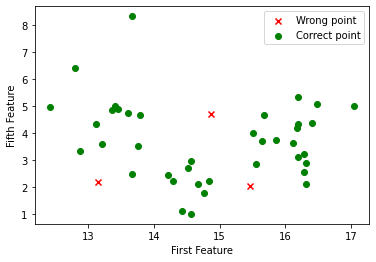

In [ ]:
# Argmax SVM 
class1_svm_prob = SVM1.predict_proba(X_test)[:,1] #model
class2_svm_prob = SVM2.predict_proba(X_test)[:,1]
class3_svm_prob = SVM3.predict_proba(X_test)[:,1]

print(class1_svm_prob)
svm_pred= np.argmax([class1_svm_prob,class2_svm_prob,class3_svm_prob], axis=0)

svm_pred += 1
counter_match=0

for i, label in enumerate(y_test):
    if y_test[i]==svm_pred[i]:
        counter_match+=1

print("Matched=",counter_match)
print("Not Matched=",(len(y_test)- counter_match))
SVM_acc=counter_match/len(y_test)
print("SVM_accuracy:",SVM_acc*100)
plotCorrectVsPredict(np.array(X_test),svm_pred, np.array(y_test))

# OVR Perceptron

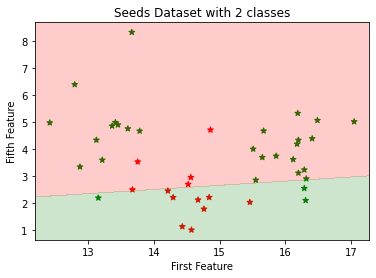

Accuracy of Perceprtor 1: 0.81

Classification Report:

              precision    recall  f1-score   support

          -1       0.84      0.90      0.87        29
           1       0.73      0.62      0.67        13

    accuracy                           0.81        42
   macro avg       0.78      0.76      0.77        42
weighted avg       0.80      0.81      0.80        42


Confusion Matrix:

[[26  3]
 [ 5  8]]


Text(0.5, 1.0, 'Perceptor1 Confusion Matrix')

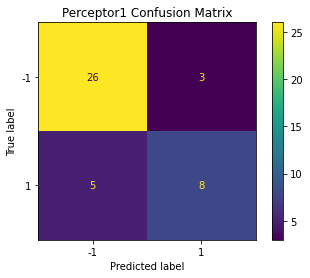

In [ ]:
# perceptor ---- obtaining confusion matrix and accuracy
 ###  class 1 virsus all 

X_train, y_train, X_test,y_test = loadDataset()

y1_train =binarizedlabels(y_train,1)
y1_test =binarizedlabels(y_test,1)

clf_p1 = Perceptron(random_state=0 ,validation_fraction=.1 ,class_weight=None)
clf_p1.fit(X_train, y1_train)

y1_pred = clf_p1.predict(X_test)

plot_data_regions(clf_p1,X_test, y1_test)
plt.show()

y1_true, y1_pred = y1_test, clf_p1.predict(X_test)
print('Accuracy of Perceprtor 1: {:.2f}'.format(accuracy_score(y1_test, y1_pred)))

print('\nClassification Report:\n')
print(classification_report(y1_true, y1_pred))

print('\nConfusion Matrix:\n')
print(confusion_matrix(y1_test, y1_pred))
pp = plot_confusion_matrix(clf_p1, X_test, y1_test)
pp.ax_.set_title("Perceptor1 Confusion Matrix")







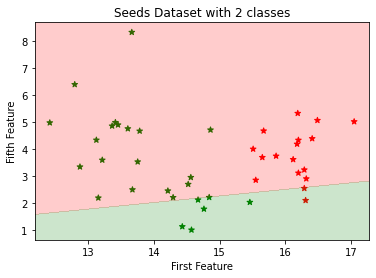

Accuracy of Perceprtor 2: 0.50

Classification Report:

              precision    recall  f1-score   support

          -1       0.56      0.76      0.64        25
           1       0.25      0.12      0.16        17

    accuracy                           0.50        42
   macro avg       0.40      0.44      0.40        42
weighted avg       0.43      0.50      0.45        42


Confusion Matrix:

[[19  6]
 [15  2]]


Text(0.5, 1.0, 'Perceptor2 Confusion Matrix')

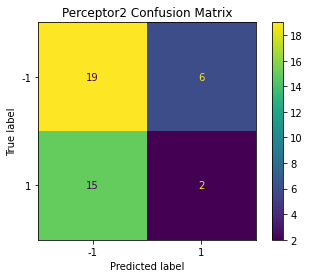

In [ ]:
# perceptor ---- obtaining confusion matrix and accuracy
 ###  class 2 virsus all 
y2_train =binarizedlabels(y_train,2)
y2_test =binarizedlabels(y_test,2)

clf_p2 = Perceptron( random_state=0 ,validation_fraction=.1 ,class_weight=None)
clf_p2.fit(X_train, y2_train)

y2_pred = clf_p2.predict(X_test)

plot_data_regions(clf_p2,X_test, y2_test)
plt.show()

y2_true, y2_pred = y2_test, clf_p2.predict(X_test)
print('Accuracy of Perceprtor 2: {:.2f}'.format(accuracy_score(y2_true, y2_pred)))

print('\nClassification Report:\n')
print(classification_report(y2_true, y2_pred))

print('\nConfusion Matrix:\n')
print(confusion_matrix(y2_true, y2_pred))
pp = plot_confusion_matrix(clf_p2, X_test, y2_true)
pp.ax_.set_title("Perceptor2 Confusion Matrix")

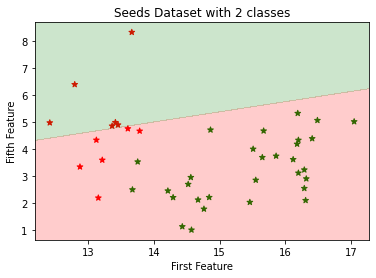

Accuracy of Perceprtor 3: 0.86

Classification Report:

              precision    recall  f1-score   support

          -1       0.83      1.00      0.91        30
           1       1.00      0.50      0.67        12

    accuracy                           0.86        42
   macro avg       0.92      0.75      0.79        42
weighted avg       0.88      0.86      0.84        42


Confusion Matrix:

[[30  0]
 [ 6  6]]


Text(0.5, 1.0, 'Perceptor3 Confusion Matrix')

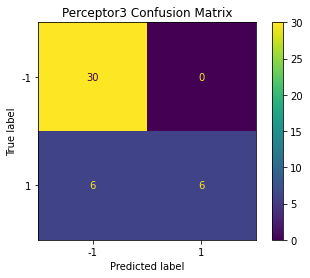

In [ ]:
# perceptor ---- obtaining confusion matrix and accuracy
 ###  class 3 virsus all 
y3_train =binarizedlabels(y_train,3)
y3_test =binarizedlabels(y_test,3)

clf_p3 = Perceptron(random_state=0 ,validation_fraction=.1 ,class_weight=None)
clf_p3.fit(X_train, y3_train)

y3_pred = clf_p3.predict(X_test)

plot_data_regions(clf_p3,X_test, y3_test)
plt.show()

y3_true, y3_pred = y3_test, clf_p3.predict(X_test)
print('Accuracy of Perceprtor 3: {:.2f}'.format(accuracy_score(y3_test, y3_pred)))

print('\nClassification Report:\n')
print(classification_report(y3_true, y3_pred))

print('\nConfusion Matrix:\n')
print(confusion_matrix(y3_test, y3_pred))
pp = plot_confusion_matrix(clf_p3, X_test, y3_test)
pp.ax_.set_title("Perceptor3 Confusion Matrix")


## perceptor ArgMax

Matched= 31
Not Matched= 11
perception accuracy: 73.80952380952381


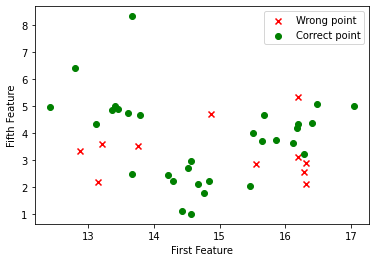

In [ ]:
class1_per_prob = clf_p1.decision_function(X_test) #model
class2_per_prob = clf_p2.decision_function(X_test)
class3_per_prob = clf_p3.decision_function(X_test)



perceptor_pred= np.argmax([class1_per_prob,class2_per_prob,class3_per_prob], axis=0)

perceptor_pred += 1
counter_match=0

for i, label in enumerate(y_test):
    if y_test[i]==perceptor_pred[i]:
        counter_match+=1

print("Matched=",counter_match)
print("Not Matched=",(len(y_test)- counter_match))
PER_acc=counter_match/len(y_test)
print("perception accuracy:",PER_acc*100)
plotCorrectVsPredict(np.array(X_test),perceptor_pred, np.array(y_test))

# Our Aggregation Function 

In [ ]:
import random

def myAggregStrat(data):
  result = []
  listOfIndexSame = []
  # loop to all values and get max value of data 
  for i,value in enumerate(data):
    max_value = max(value)
    max_index = value.index(max_value)
    y = value.index(max_value, max_index,len(value))
    if max_index != y:
      listOfIndexSame.append(y)
      listOfIndexSame.append(max_index)
      # choose random item of in case of [1,1,-1] or any number of redundant max values 
      result.append( random.choice(listOfIndexSame))
    else:
      # append index of selected  to result
      result.append(max_index)
  print(result)
  for i,value in enumerate(result):
    # filter values in case of [-1,-1,-1] and select random one from array
    if value == -1:
      result[i] = random.randint(0,2)
  return result

# Our Custom Aggregation Strategy

## Appling our Aggregation Strategy to SVM 

[[1, -1, -1], [-1, 1, -1], [-1, 1, -1], [1, -1, -1], [-1, -1, -1], [-1, 1, -1], [1, -1, 1], [-1, 1, -1], [-1, -1, 1], [-1, -1, 1], [-1, 1, -1], [-1, -1, 1], [1, -1, -1], [-1, -1, 1], [-1, 1, -1], [-1, 1, -1], [-1, 1, -1], [1, -1, -1], [-1, -1, 1], [-1, -1, -1], [-1, -1, 1], [1, -1, -1], [-1, -1, -1], [-1, -1, 1], [-1, 1, -1], [1, -1, -1], [1, -1, -1], [-1, -1, 1], [-1, 1, -1], [-1, 1, -1], [1, 1, -1], [-1, -1, 1], [-1, -1, 1], [1, -1, -1], [-1, 1, -1], [-1, 1, -1], [-1, 1, -1], [1, -1, 1], [-1, 1, -1], [1, -1, -1], [-1, 1, -1], [-1, 1, -1]]
[0, 1, 1, 0, 0, 1, 0, 1, 2, 2, 1, 2, 0, 2, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1]
Matched= 40
Not Matched= 2
SVM_accuracy: 95.23809523809523


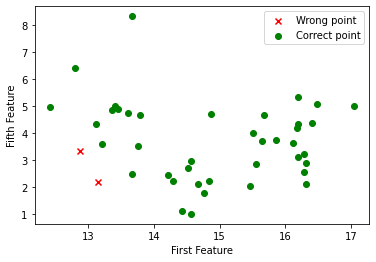

In [ ]:

svm1_pred = SVM1.predict(X_test)#model
svm2_pred = SVM2.predict(X_test)
svm3_pred = SVM3.predict(X_test)

out = []
for k in range(len(svm1_pred)):
    out.append([svm1_pred[k],svm2_pred[k],svm3_pred[k]])
print(out)


result = myAggregStrat(out)
result = np.array(result)
result += 1 
#print(result)
#print(np.array(y_test))

counter_match=0
for i, label in enumerate(y_test):
    if y_test[i]== result[i]:
        counter_match+=1
        

print("Matched=",counter_match)
print("Not Matched=",(len(y_test)- counter_match))
SVM_acc=counter_match/len(y_test)
print("SVM_accuracy:",SVM_acc*100)
plotCorrectVsPredict(np.array(X_test),result, np.array(y_test))

# Appling our Aggregation Strategy to Perceptron

[[1, 1, -1], [-1, -1, -1], [1, 1, -1], [1, 1, -1], [-1, -1, -1], [-1, -1, -1], [1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, 1], [1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [1, 1, -1], [1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, 1], [1, 1, -1], [-1, -1, -1], [-1, -1, 1], [-1, -1, -1], [1, 1, -1], [-1, -1, -1], [-1, -1, 1], [-1, -1, -1], [-1, -1, -1], [1, 1, -1], [-1, -1, 1], [-1, -1, 1], [1, 1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1], [-1, -1, -1]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Matched= 19
Not Matched= 23
perception accuracy: 45.23809523809524


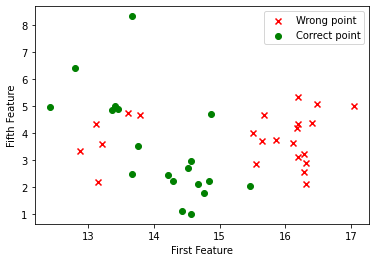

In [ ]:
per1_pred = clf_p1.predict(X_test) #model
per2_pred = clf_p2.predict(X_test)
per3_pred = clf_p3.predict(X_test)

out = []
for k in range(len(per1_pred)):
    out.append([per1_pred[k],per2_pred[k],per3_pred[k]])
print(out)

result = myAggregStrat(out)
result = np.array(result)
result += 1 
#print(result)
#print(np.array(y_test))
counter_match = 0
for i, label in enumerate(y_test):
    if y_test[i]==result[i]:
        counter_match+=1

print("Matched=",counter_match)
print("Not Matched=",(len(y_test)- counter_match))
PER_acc=counter_match/len(y_test)
print("perception accuracy:",PER_acc*100)
plotCorrectVsPredict(np.array(X_test),result, np.array(y_test))